In [22]:
from utils import spark
from pyspark.sql import functions as F
from pyspark.sql.types import *
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path='data/'
movies=spark.read.csv(file_path+'movies.csv',header=True)
movie_ratings=spark.read.csv(file_path+'ratings.csv',header=True)
movies.show(5,False)
movie_ratings.show(5,False)

+-------+----------------------------------+-------------------------------------------+
|movieId|title                             |genres                                     |
+-------+----------------------------------+-------------------------------------------+
|1      |Toy Story (1995)                  |Adventure|Animation|Children|Comedy|Fantasy|
|2      |Jumanji (1995)                    |Adventure|Children|Fantasy                 |
|3      |Grumpier Old Men (1995)           |Comedy|Romance                             |
|4      |Waiting to Exhale (1995)          |Comedy|Drama|Romance                       |
|5      |Father of the Bride Part II (1995)|Comedy                                     |
+-------+----------------------------------+-------------------------------------------+
only showing top 5 rows

+------+-------+------+----------+
|userId|movieId|rating|timestamp |
+------+-------+------+----------+
|1     |296    |5.0   |1147880044|
|1     |306    |3.5   |1147868817|

In [3]:
# converting the UTC timestamp to Datetime
movie_ratings = movie_ratings = movie_ratings.\
    withColumn('datetime', F.date_format(F.from_unixtime('timestamp'), 'yyyy-MM-dd'))
# setelah itu mari kita marging the movies dan rantings file
movie_ratings=movie_ratings.join(movies,how='inner',on="movieId")
# drop data duplicate
movie_ratings=movie_ratings.drop_duplicates(['title','genres'])
movie_ratings.show(3,False)

+-------+------+------+----------+----------+------------------------------------+--------------+
|movieId|userId|rating|timestamp |datetime  |title                               |genres        |
+-------+------+------+----------+----------+------------------------------------+--------------+
|51372  |1262  |4.5   |1314846144|2011-09-01|"""Great Performances"" Cats (1998)"|Musical       |
|195955 |21007 |3.5   |1570139090|2019-10-04|#Female Pleasure (2018)             |Documentary   |
|201174 |7865  |1.0   |1555502980|2019-04-17|#SquadGoals (2018)                  |Drama|Thriller|
+-------+------+------+----------+----------+------------------------------------+--------------+
only showing top 3 rows



In [4]:
movie_ratings=movie_ratings.drop('timestamp')
movie_ratings.show(3,False)

+-------+------+------+----------+------------------------------------+--------------+
|movieId|userId|rating|datetime  |title                               |genres        |
+-------+------+------+----------+------------------------------------+--------------+
|51372  |1262  |4.5   |2011-09-01|"""Great Performances"" Cats (1998)"|Musical       |
|195955 |21007 |3.5   |2019-10-04|#Female Pleasure (2018)             |Documentary   |
|201174 |7865  |1.0   |2019-04-17|#SquadGoals (2018)                  |Drama|Thriller|
+-------+------+------+----------+------------------------------------+--------------+
only showing top 3 rows



In [7]:
print("jumlah record datanya adalah:",movie_ratings.count())
print("jumlah feature datanya adalah:",len(movie_ratings.columns))
print("list feature adalah:",movie_ratings.columns)


jumlah record datanya adalah: 59035
jumlah feature datanya adalah: 6
list feature adalah: ['movieId', 'userId', 'rating', 'datetime', 'title', 'genres']


## data Cleaning


In [10]:
# Drop duplicates based on all columns
original_count = movie_ratings.count()
deduplicated_df = movie_ratings.dropDuplicates()

# Count the number of rows after dropping duplicates
deduplicated_count = deduplicated_df.count()

# Check if duplicates exist
if deduplicated_count < original_count:
    print("Duplicate data found.")
else:
    print("No duplicate data found.")

No duplicate data found.


karena kita telah melakukan merge/join pada data movie dan ranting
dan kita telah check data dumpicated,jadi data itu masih aman untuk perjalanan ini

In [11]:
movie_ratings.printSchema()

root
 |-- movieId: string (nullable = true)
 |-- userId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- datetime: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



dilihat dari prinschema ini mari kita ubah angka tipe data

In [18]:
movie_ratings=movie_ratings.withColumn("movieId",movie_ratings.movieId.cast(IntegerType()))\
.withColumn("userId",movie_ratings.userId.cast(IntegerType()))\
.withColumn("rating",movie_ratings.rating.cast(FloatType()))
movie_ratings.show(3,False)

+-------+------+------+----------+------------------------------------+--------------+
|movieId|userId|rating|datetime  |title                               |genres        |
+-------+------+------+----------+------------------------------------+--------------+
|51372  |1262  |4.5   |2011-09-01|"""Great Performances"" Cats (1998)"|Musical       |
|195955 |21007 |3.5   |2019-10-04|#Female Pleasure (2018)             |Documentary   |
|201174 |7865  |1.0   |2019-04-17|#SquadGoals (2018)                  |Drama|Thriller|
+-------+------+------+----------+------------------------------------+--------------+
only showing top 3 rows



In [19]:
movie_ratings.printSchema()

root
 |-- movieId: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- rating: float (nullable = true)
 |-- datetime: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



nah jadi ini ubah

In [32]:
def changingLabels(number):

    return str(number/10**6) + "M"

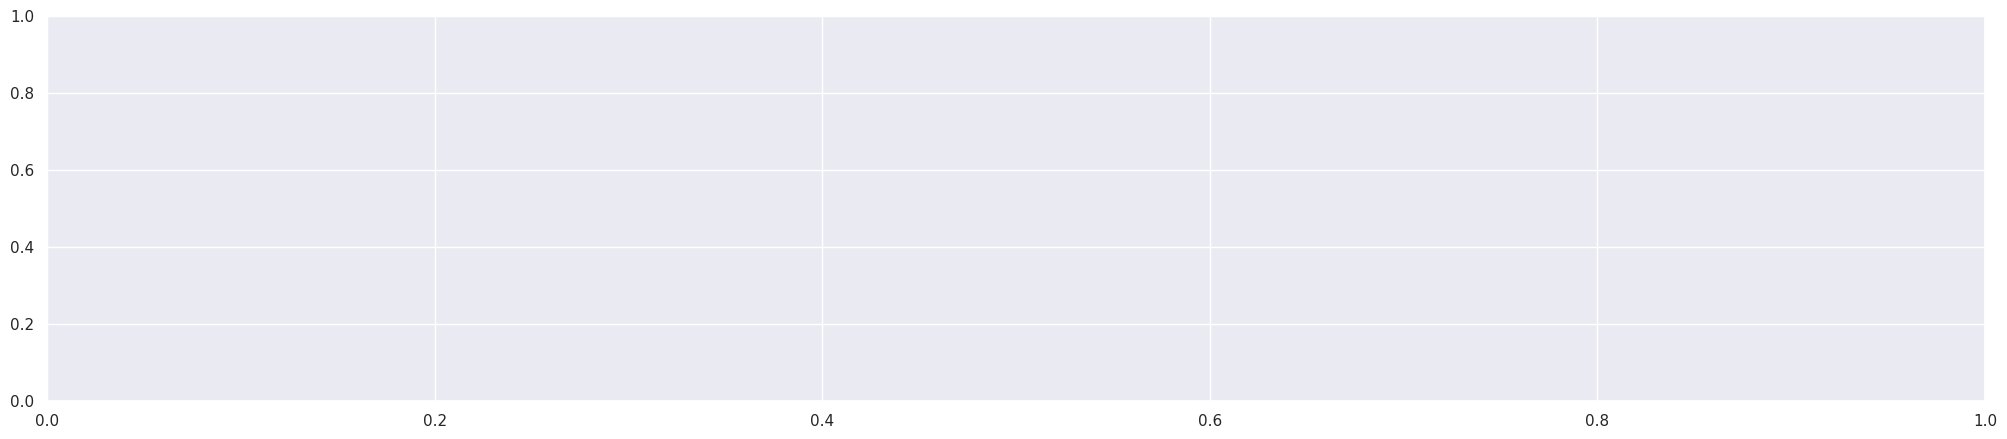

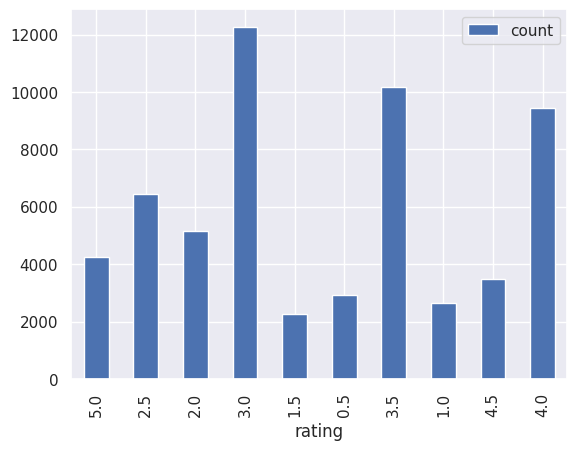

In [36]:
fig,axes=plt.subplots(1,1,figsize=(25,5),sharey=True)
count_ranting=movie_ratings.groupBy('rating').count().toPandas()
count_ranting
count_ranting.plot(kind="bar", x="rating", y="count")
plt.show()